# Single qubit rotation 

Below we start with a basic example of a hybrid variational algorithm which involves flipping the bloch vector of a qubit from the $\ket{0}$ to the $\ket{1}$ state. First we import the relevant packages and set our backend to simulate our workflow on NVIDIA GPUs. 




In [1]:
import cudaq
from cudaq import spin

cudaq.set_target('nvidia')

In [2]:
n_qubits = 1 

kernel, params = cudaq.make_kernel(list)  #Initialize a kernel/ ansatz and variational parameters

qubits = kernel.qalloc(n_qubits)  #Allocate qubits initialised to the zero state 

#Define gates and the qubits they act upon 
kernel.rx(params[0], qubits[0])   
kernel.ry(params[1], qubits[0])

hamiltonian = spin.z(0)  #Our hamiltonian is the z expectation value of our qubit 

init_params = [0, 0]  #Initial gate parameters which intialize the qubit in the zero state 

We build our cost function such that its minimal value corresponds to the qubit being in the $\ket{1}$ state. The observe call below allows us to simulate our statevector $\ket{\psi}$, and calculate $\bra{\psi}Z\ket{\psi}$.


In [3]:
def cost(params): 

    exp_val = cudaq.observe(kernel, hamiltonian, params).expectation_z()

    return exp_val


In [4]:
#We see that the initial value of our cost function is one, demonstrating that our qubit is in the zero state 

initial_cost_val = cost(init_params)

print(initial_cost_val)

1.0


CUDA Quantum integrates well with third party libraries. Below we use the scipy package to minimize our cost function using the gradient free COBYLA method. 

In [5]:
from scipy.optimize import minimize


cost_vals = []
cost_vals.append(initial_cost_val)

#The callback function is called after each parameter update and stores the value of our cost function.  

def callback(xk): 
    cost_vals.append(cost(xk))


result = minimize(cost, x0 = init_params, method='COBYLA', callback = callback)


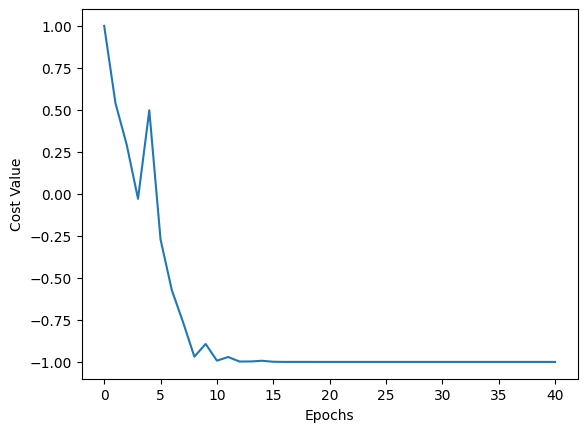

In [6]:
#Plotting how the value of the cost function decreases during the minimization procedure 
import matplotlib.pyplot as plt

x = list(range(len(cost_vals)))
y = cost_vals

plt.plot(x, y)

plt.xlabel('Epochs')
plt.ylabel('Cost Value')

plt.show()

We see that the final value or our cost function, $\bra{\psi}Z\ket{\psi} = -1$ demonstrating that the qubit is in the $\ket{1}$ state.